In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [57]:
# Charger le fichier Excel
df_excel_complete = pd.read_excel('Proj_B1_consolidado_indicadores_Eloi_version.xlsx')

# Sauvegarder le DataFrame en CSV
df_excel_complete.to_csv('Proj_B1_consolidado_indicadores.csv', index=False)

# Vérifier la conversion
df_excel_complete.head()


,DATE,TD_12M_Consolidado,TD_12M_Consolidado s/prod22,Proj_TD_12M_Consolidado,Proj_TD_12M_Consolidado 2,TD_12M_Consolidado actuel,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,201907,NaN,NaN,NaN,NaN,NaN,0.4,-0.7,6.6,0.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201908,NaN,NaN,NaN,NaN,NaN,0.4,-0.1,6.5,0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201909,NaN,NaN,NaN,NaN,NaN,0.4,-0.3,6.6,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201910,NaN,NaN,NaN,NaN,NaN,0.8,-0.1,6.6,0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201911,NaN,NaN,NaN,NaN,NaN,0.8,0.2,6.8,0.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_excel_complete.columns

Index(['DATE', 'TD_12M_Consolidado', 'TD_12M_Consolidado s/prod22',
       'Proj_TD_12M_Consolidado', 'Proj_TD_12M_Consolidado 2',
       'TD_12M_Consolidado actuel', 'GDP', 'Inflation', 'Unemployment_Rate',
       'LT_Interest_Rate', 'ST_Interest_RateE3m', 'Euribor1year',
       'Unnamed: 12', 'Unnamed: 13', 'Idmes', 'Quarter', 'GDP.1',
       'Inflation.1', 'Unemployment_Rate.1', 'LT_Interest_Rate.1',
       'ST_Interest_Rate', 'Euribor1year.1', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35'],
      dtype='object')

In [59]:
# Sélections of necessary columns
columns_needed = ['DATE',
                  'TD_12M_Consolidado s/prod22',
                  'GDP',
                  'Inflation',
                  'Unemployment_Rate',
                  'LT_Interest_Rate',
                  'ST_Interest_RateE3m',
                  'Euribor1year']

df_reduced=df_excel_complete[columns_needed]
df_reduced.head()


,DATE,TD_12M_Consolidado s/prod22,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,ST_Interest_RateE3m,Euribor1year
0,201907,NaN,0.4,-0.7,6.6,0.44,-0.3649,-0.2833
1,201908,NaN,0.4,-0.1,6.5,0.17,-0.4077,-0.3563
2,201909,NaN,0.4,-0.3,6.6,0.20,-0.4176,-0.3391
3,201910,NaN,0.8,-0.1,6.6,0.19,-0.4129,-0.3042
4,201911,NaN,0.8,0.2,6.8,0.35,-0.4013,-0.2720


In [60]:
# Recharger la colonne DATE en string
df_excel_complete['DATE'] = df_excel_complete['DATE'].astype(str)

# Extraire l'année et le mois (supposons que le format est 'YYYYMM')
df_excel_complete['DATE'] = pd.to_datetime(df_excel_complete['DATE'], format='%Y%m')

# Sélectionner les colonnes nécessaires
columns_needed = ['DATE', 'TD_12M_Consolidado s/prod22', 'GDP', 'Inflation', 'Unemployment_Rate', 'LT_Interest_Rate', 'ST_Interest_RateE3m', 'Euribor1year']
df_reduced = df_excel_complete[columns_needed]

# Mettre la colonne DATE en index
df_reduced = df_reduced.set_index('DATE')

In [61]:
df_reduced.index = pd.to_datetime(df_reduced.index)
df_reduced

,TD_12M_Consolidado s/prod22,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,ST_Interest_RateE3m,Euribor1year
DATE,,,,,,,
2019-07-01,NaN,0.4,-0.7,6.6,0.44,-0.3649,-0.2833
2019-08-01,NaN,0.4,-0.1,6.5,0.17,-0.4077,-0.3563
2019-09-01,NaN,0.4,-0.3,6.6,0.20,-0.4176,-0.3391
2019-10-01,NaN,0.8,-0.1,6.6,0.19,-0.4129,-0.3042
2019-11-01,NaN,0.8,0.2,6.8,0.35,-0.4013,-0.2720
...,...,...,...,...,...,...,...
2026-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2026-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Filtrer les données connues (jusqu'à juillet 2025 inclus)
df_known = df_reduced.loc[:'2025-07']

# Séparation train/test sur les données connues
train_size = int(len(df_known) * 0.8)
train, test = df_known[:train_size], df_known[train_size:]
train = train.dropna()
# Données à prédire (après juillet 2025)
df_forecast = df_reduced.loc['2025-08':]

# Vérification
print(train.shape, test.shape)
print(df_forecast.shape)

(46, 7) (15, 7)
(17, 7)


In [63]:
df_known

,TD_12M_Consolidado s/prod22,GDP,Inflation,Unemployment_Rate,LT_Interest_Rate,ST_Interest_RateE3m,Euribor1year
DATE,,,,,,,
2019-07-01,NaN,0.4,-0.7,6.6,0.44,-0.3649,-0.2833
2019-08-01,NaN,0.4,-0.1,6.5,0.17,-0.4077,-0.3563
2019-09-01,NaN,0.4,-0.3,6.6,0.20,-0.4176,-0.3391
2019-10-01,NaN,0.8,-0.1,6.6,0.19,-0.4129,-0.3042
2019-11-01,NaN,0.8,0.2,6.8,0.35,-0.4013,-0.2720
...,...,...,...,...,...,...,...
2025-03-01,0.051890,-0.4,1.9,6.6,3.29,2.4400,2.4000
2025-04-01,0.055663,0.6,2.1,5.9,3.11,2.2500,2.1400
2025-05-01,0.060178,0.6,1.7,5.9,3.08,2.0900,2.0800


In [64]:
#definir X et y pour l'entrainement du modele
features = ['GDP', 'Inflation', 'Unemployment_Rate', 'LT_Interest_Rate', 'ST_Interest_RateE3m', 'Euribor1year']
X_train = train[features]
y_train = train['TD_12M_Consolidado s/prod22']
X_test = test[features]
y_test = test['TD_12M_Consolidado s/prod22']


In [65]:
y_train

DATE
2020-07-01    0.043437
2020-08-01    0.040134
2020-09-01    0.040497
2020-10-01    0.041286
2020-11-01    0.042188
2020-12-01    0.042471
2021-01-01    0.041921
2021-02-01    0.039109
2021-03-01    0.036047
2021-04-01    0.027355
2021-05-01    0.023560
2021-06-01    0.023568
2021-07-01    0.025691
2021-08-01    0.025819
2021-09-01    0.026737
2021-10-01    0.027689
2021-11-01    0.028446
2021-12-01    0.029269
2022-01-01    0.027318
2022-02-01    0.027579
2022-03-01    0.028315
2022-04-01    0.032446
2022-05-01    0.033680
2022-06-01    0.035237
2022-07-01    0.036317
2022-08-01    0.041387
2022-09-01    0.042503
2022-10-01    0.045632
2022-11-01    0.051418
2022-12-01    0.056538
2023-01-01    0.045249
2023-02-01    0.046629
2023-03-01    0.048806
2023-04-01    0.049186
2023-05-01    0.048998
2023-06-01    0.050089
2023-07-01    0.051729
2023-08-01    0.050981
2023-09-01    0.045925
2023-10-01    0.050326
2023-11-01    0.052246
2023-12-01    0.044757
2024-01-01    0.042280
2024-0

In [66]:

# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import mean_squared_error
print("mean_squared_error:", mean_squared_error(y_test, y_pred))

mean_squared_error: 0.0003451681966304501


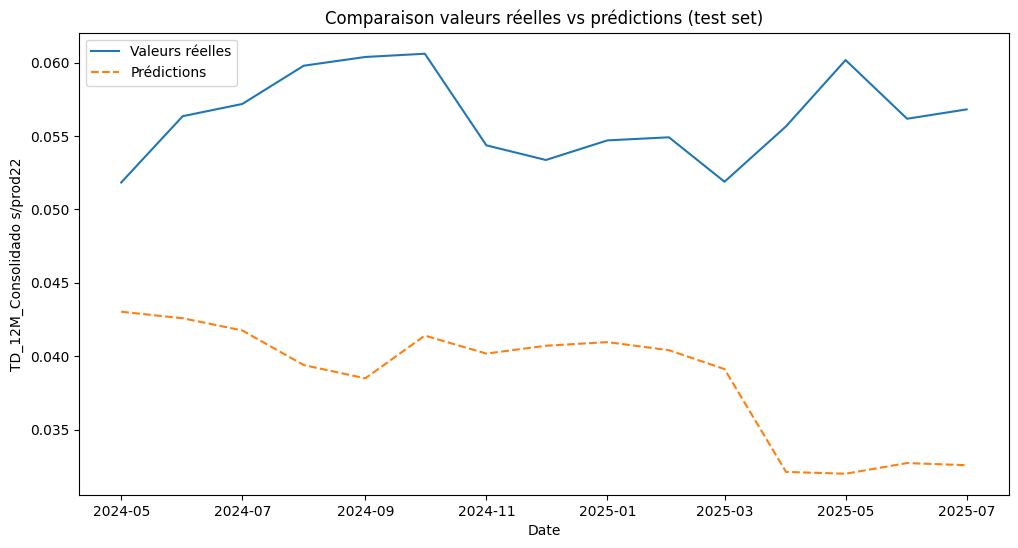

In [67]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Valeurs réelles')
plt.plot(y_test.index, y_pred, label='Prédictions', linestyle='--')
plt.xlabel('Date')
plt.ylabel('TD_12M_Consolidado s/prod22')
plt.title('Comparaison valeurs réelles vs prédictions (test set)')
plt.legend()
plt.show()

In [68]:
df_comparaison = pd.DataFrame({
    'Valeurs réelles': y_test,
    'Valeurs prédites': y_pred
}, index=y_test.index)

df_comparaison

,Valeurs réelles,Valeurs prédites
DATE,,
2024-05-01,0.051837,0.043034
2024-06-01,0.056354,0.042591
2024-07-01,0.057186,0.041760
2024-08-01,0.059794,0.039402
2024-09-01,0.060388,0.038500
2024-10-01,0.060610,0.041409
2024-11-01,0.054369,0.040183
2024-12-01,0.053372,0.040716
2025-01-01,0.054707,0.040967


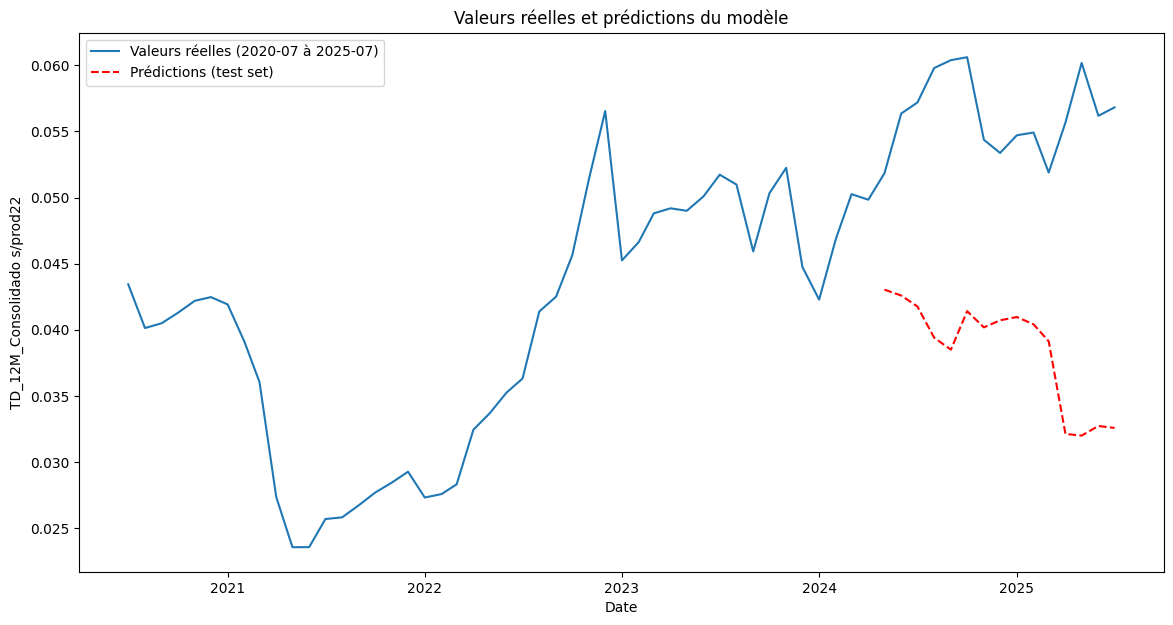

In [69]:
plt.figure(figsize=(14,7))
# Toutes les valeurs réelles connues
plt.plot(df_known.index, df_known['TD_12M_Consolidado s/prod22'], label='Valeurs réelles (2020-07 à 2025-07)')
# Les prédictions sur le test set
plt.plot(y_test.index, y_pred, label='Prédictions (test set)', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('TD_12M_Consolidado s/prod22')
plt.title('Valeurs réelles et prédictions du modèle')
plt.legend()
plt.show()

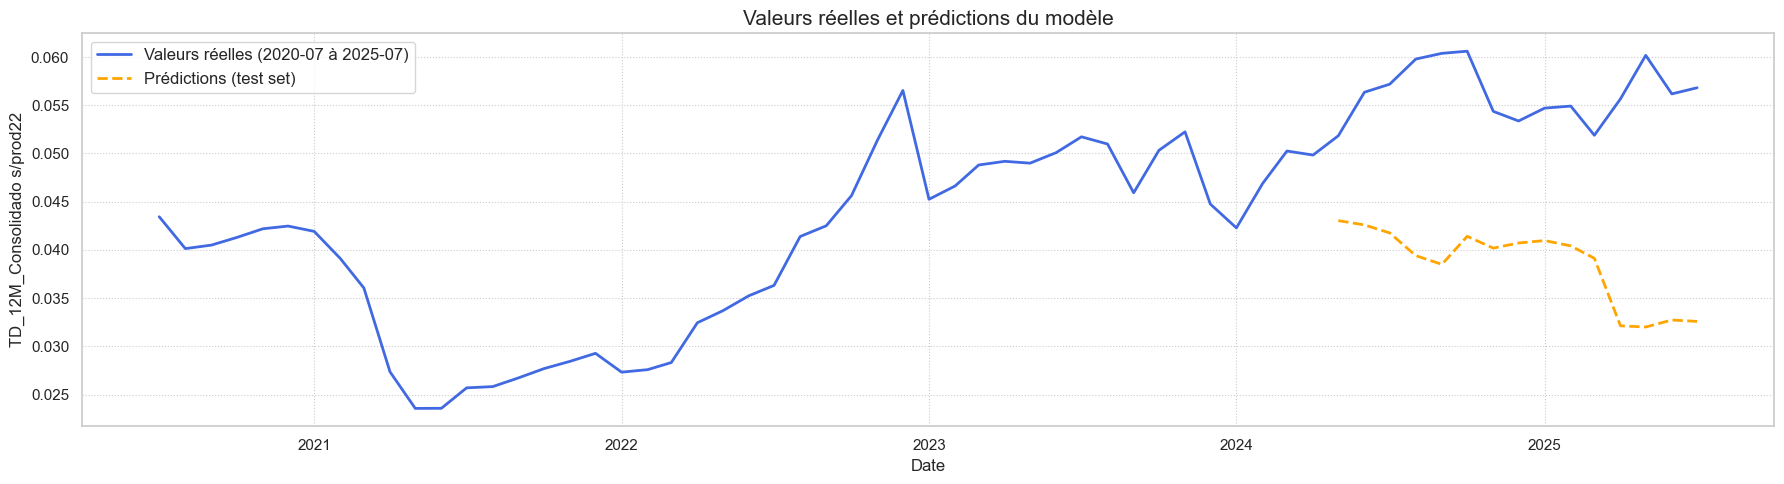

In [ ]:

sns.set(style="whitegrid")
plt.figure(figsize=(18,5))  # Format plus large et moins haut

# Toutes les valeurs réelles connues
plt.plot(df_known.index, df_known['TD_12M_Consolidado s/prod22'], label='Valeurs réelles (2020-07 à 2025-07)', color='royalblue', linewidth=2)
# Les prédictions sur le test set
plt.plot(y_test.index, y_pred, label='Prédictions (test set)', linestyle='--', color='orange', linewidth=2)

plt.xlabel('Date', fontsize=12)
plt.ylabel('TD_12M_Consolidado s/prod22', fontsize=12)
plt.title('Valeurs réelles et prédictions du modèle', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True, which='major', linestyle=':', linewidth=0.8)
plt.tight_layout()
plt.show()

In [71]:
import sys
print(sys.executable)

/Library/Developer/CommandLineTools/usr/bin/python3
